# Analysing the iris flower dataset with `sklearn`: The particle-in-a-box of data science

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix, boxplot
import matplotlib.pyplot as plt

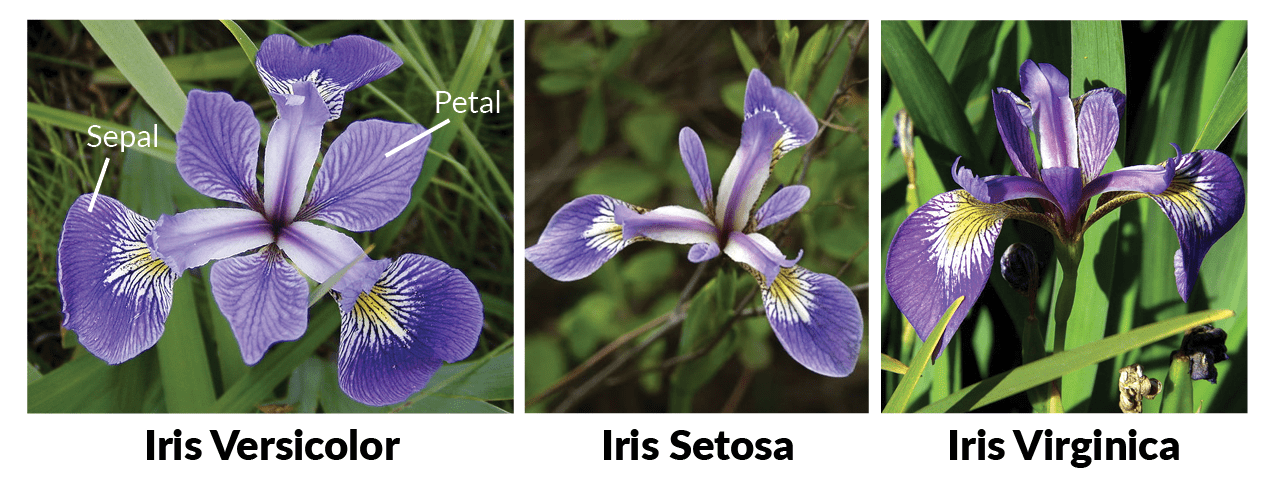

In [2]:
iris=datasets.load_iris()

In [3]:
# uncomment the following line and run to see what comes out
# print(iris) 

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# uncomment the following line and run to see what comes out
#print(iris.data)

In [6]:
print(iris.data.shape)

(150, 4)


In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Quick analysis with Pandas

In [10]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

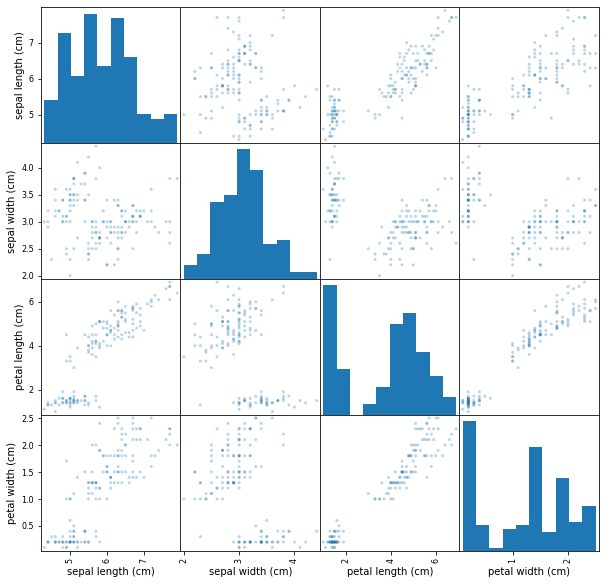

In [11]:
scatter_matrix(iris_df,alpha=0.3,figsize=(10,10))

Note that in each of the scatterplots we have all three different types of flowers. We can color code them for clarity.

In [12]:
colors=list()
palette={0:'red',1:'green',2:'blue'} # Recall, print(iris.target_names) = ['setosa' 'versicolor' 'virginica']

N_data=iris.data.shape[0]

for i_data in range(N_data):
    i_color=int(iris.target[i_data])
    colors.append(palette[i_color])

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

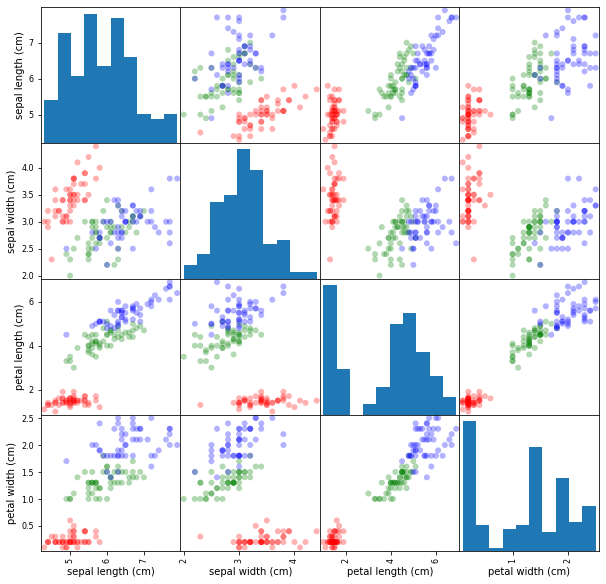

In [13]:
scatter_matrix(iris_df,alpha=0.3,figsize=(10,10),color=colors,marker='o')

Clearly, we see that some features are correlated. 

Let's also include the flower species name as another column of the dataframe.

In [14]:
iris_df['label']=iris.target

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:>

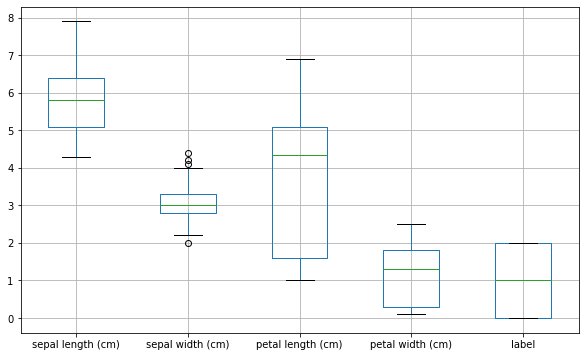

In [17]:
boxplot(iris_df,figsize=(10,6))

A box plot can show what the values of maximum, minimum, mean, 25th percentile, 50th percentile and 75th percentile in a dataset are. 50th percentile value is commonly known as the median. 

##### _An extreme value is considered to be an outlier if it is 1.5 interquartile ranges below the first quartile, or 1.5 interquartile ranges above the third quartile. Interquartile range is the height of the box. These data points may be eliminated if we think that these values are not reasonable and there maybe possible measurement errors._

To get a better idea, maybe one can also visualize the histogram of the corresponding column.

(array([ 1.,  0.,  3.,  4.,  0.,  3.,  8.,  5.,  9., 14.,  0., 10., 26.,
        11.,  0., 13.,  6., 12.,  6.,  4.,  0.,  3.,  6.,  2.,  0.,  1.,
         1.,  1.,  0.,  1.]),
 array([2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56, 2.64, 2.72, 2.8 ,
        2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44, 3.52, 3.6 , 3.68,
        3.76, 3.84, 3.92, 4.  , 4.08, 4.16, 4.24, 4.32, 4.4 ]),
 <BarContainer object of 30 artists>)

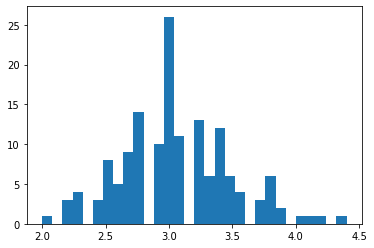

In [18]:
plt.hist(iris_df['sepal width (cm)'],bins=30)

In the above plot, the three points to the right are possible outliers. We can decide what to do with these later.

## Introduction to dimensionality reduction

In [19]:
iris_covariance=np.corrcoef(iris.data.T)
iris_covariance

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

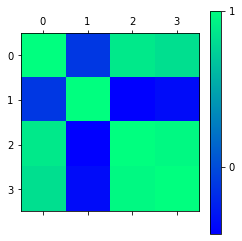

In [20]:
corr_plot=plt.matshow(iris_covariance,cmap=plt.cm.winter)
# you can change the color map using options given here 
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
plt.colorbar(corr_plot,ticks=[-1,0,+1])

The diagonal elements correspond to 1.0, so they are green. We also show that some off-diagonal elements are close to 1.0 (mostly green) implying that some features of the flower are correlated. 

Suppose, no two features are correlated, then it means that in order to describe the dataset, we need all features and there is no redundant information in feature about another feature. In a way, this means that all features are _orthogonal to one another_.

Since in the Iris dataset we that out of 4 features some are coupled, we can form some linear combinations of the features and select a smaller number (i.e. less than 2) of these _new features_ to describe all the information present in the dataset. Such _composite features_ can be obtained using the principal component analysis (PCA).

### Principal component analysis

In [21]:
from sklearn.decomposition import PCA

#### Let's see if we can find one composite feature, that is sufficient to classify all three species of Iris.

In [22]:
pca_1c=PCA(n_components=1)
x_pca_1c=pca_1c.fit_transform(iris.data)
print(x_pca_1c.shape)

(150, 1)


In [23]:
# print(x_pca_1c)  # uncomment to see

You can print exactly how the linear combination is made, and check if the vector is normalized

In [24]:
pca_1c.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]])

OK, now we have to test is this single principal component has any useful information at all. 

In [25]:
pca_1c.explained_variance_ratio_.sum()

0.9246187232017271

The quantity printed above is the percentage of variance that is attributed to the composite feature. This means that just with one component, it is possible to classify the labels of the dataset. Let's see how this might work.

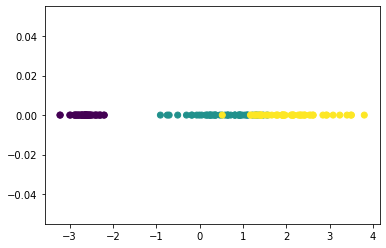

In [26]:
plt.scatter(x_pca_1c,np.zeros(150),c=iris.target)

#### Can we improve the _variance score_ using more than one principal component?

In [27]:
pca_2c=PCA(n_components=2)
x_pca_2c=pca_2c.fit_transform(iris.data)
print(x_pca_2c.shape)

(150, 2)


In [28]:
pca_2c.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [29]:
np.linalg.norm(pca_2c.components_[0])

1.0

In [30]:
np.linalg.norm(pca_2c.components_[1])

1.0000000000000002

In [31]:
pca_2c.explained_variance_ratio_.sum()

0.977685206318795

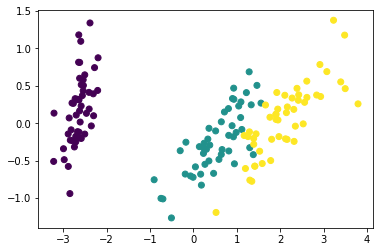

In [32]:
plt.scatter(x_pca_2c[:,0],x_pca_2c[:,1],c=iris.target)

With this 2D scatterplot, we can get some idea about what classification of labels actually means. We can draw lines as in a map to divide regions where we can locate all data point corresponding to same label. 

In general, one would like to keep as few principal components as possible until the prediction score given by `explained_variance_ratio_.sum()` is improved sufficiently, say for example reaches 0.95 or so.

In [35]:
for n in range(0,5):
    pca_nc=PCA(n_components=n)
    x_pca_nc=pca_nc.fit_transform(iris.data)
    score=pca_nc.explained_variance_ratio_.sum()
    print(n, score)


0 0.0
1 0.9246187232017271
2 0.977685206318795
3 0.9947878161267247
4 1.0


In the next class we will look at the math behind PCA.